<a href="https://colab.research.google.com/github/md-abdullah-al-mamun-mojumder/Artificial-intelligence/blob/main/taxi_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MD ABDULLAH AL MAMAUN MOJUMDER**

**SAU/CS(M)/2023/03**

**Algorithm Design**

State Variables:

1.   Taxi Location: 25 grid positions.
2.   Passenger Location: 5 possible states {R, G, B, Y, In Taxi}.
3.   Drop-off Location: 4 possible states {R, G, B, Y}.

**Trial Initialization:**

1.  Taxi starts in any random grid position.
2.  Passenger starts in one of the 5 random states.
3.  Drop-off location is chosen randomly among the 4.

**Termination:**

1.  Successful drop-off at the correct location.
2.  Time constraint is reached (maximum steps).

**Actions:**

1.  Move north.
2.  Move south.
3.  Move west.
4.  Move east.
5.  Pick up passenger.
6.  Drop off passenger.

**Rewards:**

1.   −1: Invalid movements or failed pick-up/drop-off attempts.

2.   1: Successful pick-up.
3.   10/steps since pick-up : Successful drop-off.
4.   0: All other cases.

In [ ]:
#Import Libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import gym
from gym.envs.toy_text import TaxiEnv


In [ ]:
#Initialize Environment and Hyperparameters

# Initialize Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode=None, new_step_api=True)  # Enable new API

# Hyperparameters
alpha = 0.8  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 1.0  # Initial exploration rate
min_epsilon = 0.01  # Minimum exploration rate
decay_rate = 0.005  # Exploration decay rate
episodes = 1500  # Number of episodes
max_steps = 100  # Max steps per episode

# Initialize Q-Table
state_size = env.observation_space.n
action_size = env.action_space.n
q_table = np.zeros((state_size, action_size))



In [ ]:
#Define Training Loop

rewards = []
for episode in range(episodes):
    state = env.reset()  # Initialize state
    total_rewards = 0

    for step in range(max_steps):
        # Exploration vs. Exploitation
        if random.uniform(0, 1) > epsilon:
            action = np.argmax(q_table[state, :])  # Exploit
        else:
            action = env.action_space.sample()  # Explore

        # Take action, observe reward and next state
        step_result = env.step(action)
        if len(step_result) == 5:  # Newer gym version
            new_state, reward, terminated, truncated, _ = step_result
            done = terminated or truncated
        else:  # Older gym version
            new_state, reward, done, _ = step_result

        # Update Q-Table
        q_table[state, action] += alpha * (reward + gamma * np.max(q_table[new_state, :]) - q_table[state, action])

        state = new_state
        total_rewards += reward

        if done:
            break

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * np.exp(-decay_rate * episode))
    rewards.append(total_rewards)


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [ ]:
#Evaluate the Agent

# Reset environment and handle returned value based on gym version
reset_result = env.reset()
if isinstance(reset_result, tuple):  # Newer gym versions
    test_state = reset_result[0]
else:  # Older gym versions
    test_state = reset_result

env.render()
total_test_rewards = 0

for step in range(max_steps):
    action = np.argmax(q_table[test_state, :])  # Exploit learned policy
    step_result = env.step(action)

    # Handle output from env.step
    if len(step_result) == 5:  # Newer gym versions
        new_state, reward, terminated, truncated, _ = step_result
        done = terminated or truncated
    else:  # Older gym versions
        new_state, reward, done, _ = step_result

    total_test_rewards += reward
    env.render()

    if done:
        break

    test_state = new_state

print("Total test rewards:", total_test_rewards)


/usr/local/lib/python3.10/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3149: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3149: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

Total test rewards: 8


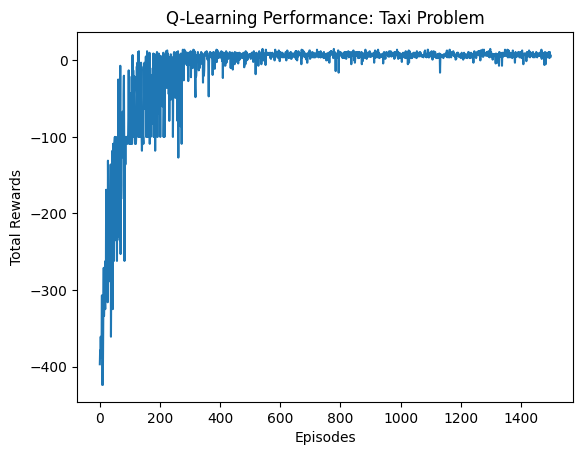

In [ ]:
#Graphical Representations
# Plot average reward over episodes
plt.plot(range(episodes), rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Rewards")
plt.title("Q-Learning Performance: Taxi Problem")
plt.show()



In [ ]:
# Visualize best actions for each state
for state in range(state_size):
    best_action = np.argmax(q_table[state, :])
    print(f"State {state}: Best Action {best_action}")


State 0: Best Action 0
State 1: Best Action 4
State 2: Best Action 4
State 3: Best Action 4
State 4: Best Action 0
State 5: Best Action 0
State 6: Best Action 2
State 7: Best Action 2
State 8: Best Action 0
State 9: Best Action 0
State 10: Best Action 0
State 11: Best Action 0
State 12: Best Action 0
State 13: Best Action 2
State 14: Best Action 0
State 15: Best Action 0
State 16: Best Action 5
State 17: Best Action 0
State 18: Best Action 0
State 19: Best Action 0
State 20: Best Action 0
State 21: Best Action 3
State 22: Best Action 3
State 23: Best Action 3
State 24: Best Action 0
State 25: Best Action 0
State 26: Best Action 0
State 27: Best Action 0
State 28: Best Action 0
State 29: Best Action 3
State 30: Best Action 0
State 31: Best Action 3
State 32: Best Action 0
State 33: Best Action 0
State 34: Best Action 0
State 35: Best Action 0
State 36: Best Action 3
State 37: Best Action 0
State 38: Best Action 3
State 39: Best Action 0
State 40: Best Action 0
State 41: Best Action 0
St